# Regression with Neural Net using Tensorflow

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import  train_test_split 

In [3]:
# --- defining the Franke function
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

# --- Generating dataset
n = 100 # the square root of the number of datapoints
x, y = np.linspace(0,1,n), np.linspace(0,1,n)
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()

k = .01 # noise coefficient
z = FrankeFunction(x,y) + k*np.random.randn(n**2) # target variable with standard normal noise

X = np.column_stack((x,y))

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

In [4]:
# --- defining the neural net
def build_and_compile_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),       # defines the input shape of the neural net
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # single output unit for regression
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mean_squared_error')
    return model

# --- we define the input shape for the neural net and buil+compile the model
input_shape = X_train.shape[1:]
model = build_and_compile_model(input_shape)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
model.fit(X_train, z_train, epochs=100, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, z_test)
print(f'Test loss: {loss}')


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 0.0934 - val_loss: 0.0053
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.0021 - val_loss: 0.0017
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.0018 - val_loss: 0.0015
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 7.7908e-04 - val_loss: 8.0507e-04
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 5.8612e-04 - val_loss: 6.0428e-04
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 5.5137e-04 - val_loss: 4.7600e-04
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 4.3487e-04 - val_loss: 3.1573e-04
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 3.2724e-04 - 

### Plotting the prediction and the data

In [6]:
z_total = model.predict(X)
total_loss = model.evaluate(X, z)
print(f'Total loss: {total_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 2.1483e-04
Total loss: 0.0001908180129248649


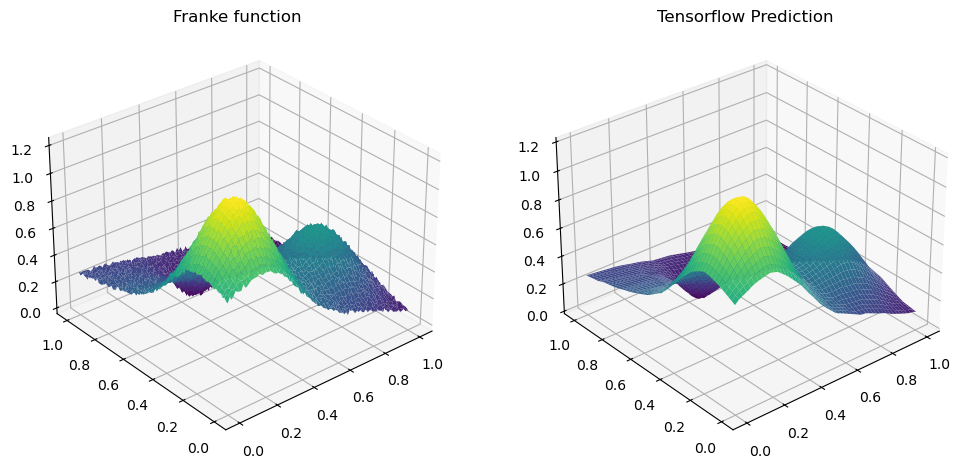

In [7]:
# REshaping for plotting
x_plot = x.reshape((n,n))
y_plot = y.reshape((n,n))
z_plot = z_total.reshape((n,n))
z_orig_plot = z.reshape((n,n))

fig = plt.figure(figsize=(12, 6))

# Plotting the datapoints
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_plot, y_plot, z_orig_plot, cmap='viridis', edgecolor='none')
ax.set_title('Franke function')
ax.view_init(azim=230)

# Plot the polynomial regression prediction 
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x_plot, y_plot, z_plot, cmap='viridis', edgecolor='none')
ax.set_title('Tensorflow Prediction')
ax.view_init(azim=230)

plt.show()